In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from Functions import onefig,figtwo,figthree, createdataset1,createdataset11 
from Functions import create_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import TimeDistributed
from autots import AutoTS

tf.config.list_physical_devices('GPU')
tf.random.set_seed(42)

In [21]:
data_path_e = "D:/TIME_SERIES_FORECASTING/input/"

In [22]:
"""     LOAD and PROCESS AAPL1 DATA                                  """

data_AAPL1 = pd.read_csv(data_path_e +'AAPL1.csv')
data_AAPL1['Date'] = pd.to_datetime(data_AAPL1['Date'],infer_datetime_format=True)

print(f"data_AAPL1[:3] : \n {data_AAPL1[:3]} \n")
print(f"data_AAPL1.shape {data_AAPL1.shape} \n")
print(f"data_AAPL1.info()")
data_AAPL1.info()

data_AAPL1[:3] : 
         Date      Open      High       Low   Close  Adj Close     Volume
0 2010-04-01  8.478929  8.526071  8.312500  8.4275   7.183753  603145200
1 2010-04-05  8.392143  8.518214  8.384643  8.5175   7.260470  684507600
2 2010-04-06  8.507143  8.580000  8.464286  8.5550   7.292434  447017200 

data_AAPL1.shape (3197, 7) 

data_AAPL1.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3197 non-null   datetime64[ns]
 1   Open       3197 non-null   float64       
 2   High       3197 non-null   float64       
 3   Low        3197 non-null   float64       
 4   Close      3197 non-null   float64       
 5   Adj Close  3197 non-null   float64       
 6   Volume     3197 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 175.0 KB


In [23]:
data4feat_AAPL1 = data_AAPL1.drop(axis=1, labels=['Adj Close','Volume'])
col_order = ['Date', 'Open','High','Low','Close']
data4feat_AAPL1 = data4feat_AAPL1.reindex(columns=col_order)
print(f"data4feat_AAPL1[:3]: \n {data4feat_AAPL1[:3]} \n")




data4feat_AAPL1[:3]: 
         Date      Open      High       Low   Close
0 2010-04-01  8.478929  8.526071  8.312500  8.4275
1 2010-04-05  8.392143  8.518214  8.384643  8.5175
2 2010-04-06  8.507143  8.580000  8.464286  8.5550 



In [24]:
data_AAPL1x = data4feat_AAPL1.iloc[:,1:]
#data_AAPL1y = data4feat_AAPL1.iloc[:,1:2]

data4feat_AAPL1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3197 non-null   datetime64[ns]
 1   Open    3197 non-null   float64       
 2   High    3197 non-null   float64       
 3   Low     3197 non-null   float64       
 4   Close   3197 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 125.0 KB


In [25]:
"""Parameters"""

  
n_stepsin = 100 # number of steps for train  
n_stepsout = 20 #number of forecasted steps    
rn = 50  #number to extend the true data size

data_AAPL12.shape (3087, 4) 

data_AAPLfc: 
            Date        Open
3037 2022-04-25  161.119995
3038 2022-04-26  162.250000
3039 2022-04-27  155.910004
3040 2022-04-28  159.250000
3041 2022-04-29  161.839996
3042 2022-05-02  156.710007
3043 2022-05-03  158.149994
3044 2022-05-04  159.669998
3045 2022-05-05  163.850006
3046 2022-05-06  156.009995
3047 2022-05-09  154.929993
3048 2022-05-10  155.520004
3049 2022-05-11  153.500000
3050 2022-05-12  142.770004
3051 2022-05-13  144.589996
3052 2022-05-16  145.550003
3053 2022-05-17  148.860001
3054 2022-05-18  146.850006
3055 2022-05-19  139.880005
3056 2022-05-20  139.089996 



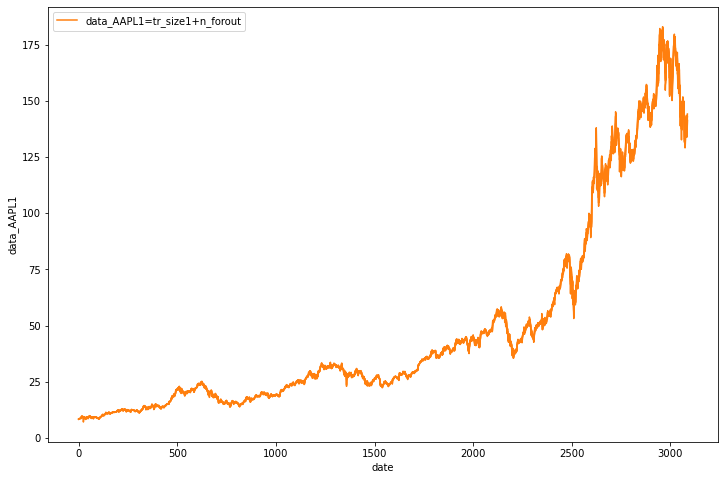

In [26]:
tf.test.is_gpu_available()


"""              Train Test Split                                           """


train_size = int(len(data_AAPL1)) #entire size of data AAPL1
tr_size = int(len(data_AAPL1) * 0.65) # train size of data
#print(f"tr_size {tr_size} \n")


#tr_size1 = int(train_size*0.85)  #train and test sizes 
#tr_size1 = int(train_size*0.88)  #train and test sizes 
#tr_size1 = int(train_size*0.80)  #train and test sizes 
tr_size1 = int(train_size*0.95)  #train and test sizes 

data_AAPL12 = data_AAPL1x[0:(tr_size1+rn)] #train size + test size + forecast size
data_AAPLf11 = data4feat_AAPL1[0:(tr_size1)]

data_AAPLfc = data4feat_AAPL1.iloc[:,0:2]
data_AAPLfc = data_AAPLfc[(tr_size1):(tr_size1+n_stepsout)]


print(f"data_AAPL12.shape {data_AAPL12.shape} \n")
#print(f"data_AAPLf11[:3]: \n {data_AAPLf11[:3]} \n")
print(f"data_AAPLfc: \n {data_AAPLfc} \n")

onefig(12,8,data_AAPL12,'date','data_AAPL1','data_AAPL1=tr_size1+n_forout')


In [27]:

"""                             Training                                    """

model = AutoTS(forecast_length=20, frequency='infer', 
               ensemble='simple')

model = model.fit(data_AAPLf11, date_col='Date', value_col='Open', id_col=None)



prediction = model.predict()
forecast = prediction.forecast
forcst = np.array(forecast)
print(f"forcst.shape {forcst.shape} \n")
#print(f"forcst {forcst} \n")

print("Stock Price Prediction of Apple")
print(forecast)


Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model ARIMA in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10
Model Number: 9 with model DatepartRegression in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 10
Epoch 1/50
138/138 [==============================] - 6s 5ms/step - loss: 0.4110
Epoch 2/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3993
Epoch 3/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3917
Epoch 4/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3906
Epoch 5/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3910
Epoch 6/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3897
Epoch 7/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3886
Epoch 8/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3881
Epoch 9/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3889
Epoch 10/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3878
Epoch 11/50
138/138 [==============================] - 1s 4ms/step - loss: 0.3886
Epoch 12/50
138/138 [=================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\preprocessing\_data.py:3218: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 29 with model UnobservedComponents in generation 0 of 10
Model Number: 30 with model UnobservedComponents in generation 0 of 10
Model Number: 31 with model UnobservedComponents in generation 0 of 10
Model Number: 32 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 32: VAR
Model Number: 33 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 33: VAR
Model Number: 34 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 34: VECM
Model Number: 35 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 35: VECM
Model Number: 36 with model WindowRegression in generation 0 of 10
Model Number: 37 with model ConstantNaive in generation 0 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 with model MultivariateMotif in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 with model UnivariateMotif in generation 0 of 10
Model Number: 54 with model SectionalMotif in generation 0 of 10
Model Number: 55 with model SectionalMotif in generation 0 of 10
Model Number: 56 with model MultivariateRegression in generation 0 of 10
Model Number: 57 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 60 with model NVAR in generation 0 of 10


[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultip

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 99 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 99: VAR
Model Number: 100 with model GLM in generation 0 of 10
Model Number: 101 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 101: ARCH
Model Number: 102 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 102: VAR
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 104: UnobservedComponents
Model Number: 105 with model ConstantNaive in generation 0 of 10
Model Number: 106 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Model Number: 127 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARIMA
Model Number: 128 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128: VAR
Model Number: 129 with model Theta in generation 0 of 10
Model Number: 130 with model SeasonalNaive in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132: ARCH
Model Number: 133 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one va

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 180 with model UnobservedComponents in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model LastValueNaive in generation 0 of 10
Model Number: 183 with model DatepartRegression in generation 0 of 10
Model Number: 184 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 184: ARIMA
Model Number: 185 with model MultivariateRegression in generation 0 of 10
Model Number: 186 with model AverageValueNaive in generation 0 of 10
Model Number: 187 with model ETS in generation 0 of 10
Model Number: 188 with model ETS in generation 0 of 10
New Generation: 1 of 10
Model Number: 189 with model WindowRegression in generation 1 of 10
Model Number: 190 with model NVAR in generation 1 of 10
Model Number: 191 with model AverageValueNaive in generation 1 of 10
Model Number: 192 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 198 with model UnivariateMotif in generation 1 of 10
Model Number: 199 with model GLS in generation 1 of 10
Model Number: 200 with model ARIMA in generation 1 of 10
Model Number: 201 with model AverageValueNaive in generation 1 of 10
Model Number: 202 with model UnivariateRegression in generation 1 of 10
Model Number: 203 with model MultivariateMotif in generation 1 of 10
Model Number: 204 with model ARIMA in generation 1 of 10
Model Number: 205 with model SeasonalNaive in generation 1 of 10
Model Number: 206 with model SeasonalNaive in generation 1 of 10
Model Number: 207 with model SectionalMotif in generation 1 of 10
Model Number: 208 with model LastValueNaive in generation 1 of 10
Model Number: 209 with model MultivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 209: MultivariateMotif
Model Number: 210 with model ETS in generation 1 of 10
Model Number: 211 with model UnivariateMotif in generation 1 o

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 219 with model ARIMA in generation 1 of 10
Model Number: 220 with model LastValueNaive in generation 1 of 10
Model Number: 221 with model DatepartRegression in generation 1 of 10
Model Number: 222 with model Theta in generation 1 of 10
Model Number: 223 with model UnivariateMotif in generation 1 of 10
Model Number: 224 with model LastValueNaive in generation 1 of 10
Model Number: 225 with model LastValueNaive in generation 1 of 10
Model Number: 226 with model UnivariateRegression in generation 1 of 10
Model Number: 227 with model ConstantNaive in generation 1 of 10
Model Number: 228 with model UnobservedComponents in generation 1 of 10
Model Number: 229 with model SeasonalNaive in generation 1 of 10
Model Number: 230 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 230: DatepartRegression
Model Number: 231 with model AverageValueNaive in generation 1 of 10
Model Number: 232 with mo

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 243 with model MultivariateRegression in generation 1 of 10
Model Number: 244 with model MultivariateRegression in generation 1 of 10
Model Number: 245 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 246 with model ARIMA in generation 1 of 10
Model Number: 247 with model LastValueNaive in generation 1 of 10
Model Number: 248 with model ConstantNaive in generation 1 of 10
Model Number: 249 with model UnivariateMotif in generation 1 of 10
Model Number: 250 with model Theta in generation 1 of 10
Model Number: 251 with model MultivariateMotif in generation 1 of 10
Model Number: 252 with model GLS in generation 1 of 10
Model Number: 253 with model Theta in generation 1 of 10
Model Number: 254 with model Theta in generation 1 of 10
Model Numbe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 257 with model ETS in generation 1 of 10
Model Number: 258 with model AverageValueNaive in generation 1 of 10
Model Number: 259 with model MultivariateMotif in generation 1 of 10
Model Number: 260 with model MetricMotif in generation 1 of 10
Model Number: 261 with model MultivariateMotif in generation 1 of 10
Model Number: 262 with model LastValueNaive in generation 1 of 10
Model Number: 263 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 263: DatepartRegression
Model Number: 264 with model LastValueNaive in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 265 with model MultivariateMotif in generation 1 of 10
Model Number: 266 with model AverageValueNaive in generation 1 of 10
Model Number: 267 with model MultivariateRegression in generation 1 of 10
Model Number: 268 with model MultivariateRegression in generation 1 of 10
Model Number: 269 with model LastValueNaive in generation 1 of 10
Model Number: 270 with model LastValueNaive in generation 1 of 10
Model Number: 271 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 271: UnobservedComponents
Model Number: 272 with model UnobservedComponents in generation 1 of 10
Model Number: 273 with model UnivariateRegression in generation 1 of 10
Model Number: 274 with model SeasonalNaive in generation 1 of 10
Model Number: 275 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 309: GLM
Model Number: 310 with model UnivariateMotif in generation 1 of 10
Model Number: 311 with model SectionalMotif in generation 1 of 10
Model Number: 312 with model UnobservedComponents in generation 1 of 10
Model Number: 313 with model SeasonalNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 313: SeasonalNaive
New Generation: 2 of 10
Model Number: 314 with model AverageValueNaive in generation 2 of 10
Model Number: 315 with model ETS in generation 2 of 10
Model Number: 316 with model ARDL in generation 2 of 10
Model Number: 317 with model LastValueNaive in generation 2 of 10
Model Number: 318 with model LastValueNaive in generation 2 of 10
Model Number: 319 with model SectionalMotif in generation 2 of 10
Model Number: 320 with model MetricMotif in generation 2 of 10
Mod

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 365 with model NVAR in generation 2 of 10
Model Number: 366 with model ConstantNaive in generation 2 of 10
Model Number: 367 with model ARIMA in generation 2 of 10
Model Number: 368 with model SeasonalNaive in generation 2 of 10
Model Number: 369 with model ARIMA in generation 2 of 10
Model Number: 370 with model ConstantNaive in generation 2 of 10
Model Number: 371 with model UnobservedComponents in generation 2 of 10
Model Number: 372 with model MetricMotif in generation 2 of 10
Model Number: 373 with model Theta in generation 2 of 10
Model Number: 374 with model GLS in generation 2 of 10
Model Number: 375 with model MetricMotif in generation 2 of 10
Model Number: 376 with model GLM in generation 2 of 10
Model Number: 377 with model SectionalMotif in generation 2 of 10
Model Number: 378 with model GLS in generation 2 of 10
Model Number: 379 with model AverageValueNaive in generation 2 of 10
Model Number: 380 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 381 with model UnivariateMotif in generation 2 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 382 with model Theta in generation 2 of 10
Model Number: 383 with model ETS in generation 2 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 384 with model AverageValueNaive in generation 2 of 10
Model Number: 385 with model ETS in generation 2 of 10
Model Number: 386 with model UnivariateMotif in generation 2 of 10
Model Number: 387 with model LastValueNaive in generation 2 of 10
Model Number: 388 with model MultivariateRegression in generation 2 of 10
[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 389 with model UnobservedComponents in generation 2 of 10
Model Number: 390 with model MultivariateMotif in generation 2 of 10
Model Number: 391 with model NVAR in generation 2 of 10
Model Number: 392 with model ARIMA in generation 2 of 10
Model Number: 393 with model ARDL in generation 2 of 10
Model Number: 394 with model MultivariateRegression in generation 2 of 10
Model Number: 395 with model Theta in generation 2 of 10
Model Number: 396 with model MultivariateMotif in generation 2 of 10
Model Number: 397 with model MultivariateMotif in generation 2 of 10
Model Number: 398 with model DatepartRegression in generation 2 of 10
Model Number: 399 with model Theta in generation 2 of 10
Model Number: 400 with model MultivariateMotif in generation 2 of 10
Model Number: 401 with model MultivariateMotif in generation 2 of 10
Model Number: 402 with model SectionalMotif in generation 2 of 10
Model Number: 403 with model AverageValueNaive in generation 2 of 10
Model Number: 404 wit

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 437 with model DatepartRegression in generation 2 of 10
Model Number: 438 with model WindowRegression in generation 2 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


New Generation: 3 of 10
Model Number: 439 with model Theta in generation 3 of 10
Model Number: 440 with model UnivariateMotif in generation 3 of 10
Model Number: 441 with model SectionalMotif in generation 3 of 10
Model Number: 442 with model MetricMotif in generation 3 of 10
Model Number: 443 with model LastValueNaive in generation 3 of 10
Model Number: 444 with model MetricMotif in generation 3 of 10
Model Number: 445 with model UnivariateMotif in generation 3 of 10
Model Number: 446 with model NVAR in generation 3 of 10
Model Number: 447 with model Theta in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 447: Theta
Model Number: 448 with model LastValueNaive in generation 3 of 10
Model Number: 449 with model MultivariateMotif in generation 3 of 10
Model Number: 450 with model SeasonalNaive in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: overflow encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\scipy\interpolate\_polyint.py:559: RuntimeWarning: divide by zero encountered in double_scalars
  self.wi[i] = 1.0 / np.prod(dist)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 451 with model ARIMA in generation 3 of 10
Model Number: 452 with model LastValueNaive in generation 3 of 10
Model Number: 453 with model MetricMotif in generation 3 of 10
Model Number: 454 with model ARIMA in generation 3 of 10
Model Number: 455 with model ARIMA in generation 3 of 10
Model Number: 456 with model ARIMA in generation 3 of 10
Model Number: 457 with model MultivariateMotif in generation 3 of 10
Model Number: 458 with model NVAR in generation 3 of 10
Model Number: 459 with model GLS in generation 3 of 10
Model Number: 460 with model LastValueNaive in generation 3 of 10
Model Number: 461 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 461: DatepartRegression
Model Number: 462 with model Theta in generation 3 of 10
Model Number: 463 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 463: ETS
Model N

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.53376e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 468 with model MultivariateMotif in generation 3 of 10
Model Number: 469 with model ConstantNaive in generation 3 of 10
Model Number: 470 with model Theta in generation 3 of 10
Model Number: 471 with model GLM in generation 3 of 10
Model Number: 472 with model MultivariateMotif in generation 3 of 10
Model Number: 473 with model MultivariateMotif in generation 3 of 10
Model Number: 474 with model ETS in generation 3 of 10
Model Number: 475 with model LastValueNaive in generation 3 of 10
Model Number: 476 with model UnivariateMotif in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 477 with model SeasonalNaive in generation 3 of 10
Model Number: 478 with model ConstantNaive in generation 3 of 10
Model Number: 479 with model UnivariateRegression in generation 3 of 10
Model Number: 480 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 480: ETS
Model Number: 481 with model AverageValueNaive in generation 3 of 10
Model Number: 482 with model MultivariateRegression in generation 3 of 10
[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 483 with model UnivariateRegression in generation 3 of 10
Model Number: 484 with model MultivariateMotif in generation 3 of 10
Model Number: 485 with model UnobservedComponents in generation 3 of 10
Model Number: 486 with model ARIMA in generation 3 of 10
Model Number: 487 with model UnobservedComponents in generation 3 of 10
Model Number: 488 with model WindowRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 488: WindowRegression
Model Number: 489 with model MultivariateRegression in generation 3 of 10
[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 490 with model ConstantNaive in generation 3 of 10
Model Number: 491 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 491: UnobservedComponents
Model Number: 492 with model SectionalMotif in generation 3 of 10
Model Number: 493 with model UnivariateRegression in generation 3 of 10
Model Number: 494 with model UnivariateMotif in generation 3 of 10
Model Number: 495 with model SectionalMotif in generation 3 of 10
Model Number: 496 with model NVAR in generation 3 of 10
Model Number: 497 with model LastValueNaive in generation 3 of 10
Model Number: 498 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 498: ConstantNaive
Model Number: 499 with model MultivariateRegression in generation 3 of 10
Model Number: 500 with model MetricMotif in generation 3 of 10
Model Number: 501 with model ConstantNaive in generation 3 of 10
Model N

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 509 with model ARDL in generation 3 of 10
Model Number: 510 with model UnivariateMotif in generation 3 of 10
Model Number: 511 with model UnivariateMotif in generation 3 of 10
Model Number: 512 with model UnivariateMotif in generation 3 of 10
Model Number: 513 with model SectionalMotif in generation 3 of 10
Model Number: 514 with model MetricMotif in generation 3 of 10
Model Number: 515 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 515: UnivariateMotif
Model Number: 516 with model ARDL in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 516: ARDL
Model Number: 517 with model SectionalMotif in generation 3 of 10
Model Number: 518 with model NVAR in generation 3 of 10
Model Number: 519 with model ARIMA in generation 3 of 10
Model Number: 520 with model AverageValueNaive in generation 3 of 10
Model Number: 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 540 with model MultivariateMotif in generation 3 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 541 with model ConstantNaive in generation 3 of 10
Model Number: 542 with model Theta in generation 3 of 10
Model Number: 543 with model UnivariateMotif in generation 3 of 10
Model Number: 544 with model NVAR in generation 3 of 10
Model Number: 545 with model SectionalMotif in generation 3 of 10
Model Number: 546 with model ARDL in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 546: ARDL
Model Number: 547 with model SectionalMotif in generation 3 of 10
Model Number: 548 with model GLM in generation 3 of 10
Model Number: 549 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 549: MultivariateRegression
Model Number: 550 with model SectionalMotif in generation 3 of 10
Model Number: 551 with model MetricMotif in generation 3 of 10
Model Number: 552 with model ETS in generation 3 of 10
Model Number: 553 with model ARDL in generati

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 554 with model Theta in generation 3 of 10
Model Number: 555 with model DatepartRegression in generation 3 of 10
Model Number: 556 with model AverageValueNaive in generation 3 of 10
Model Number: 557 with model LastValueNaive in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 558 with model MetricMotif in generation 3 of 10
Model Number: 559 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 559: UnobservedComponents
Model Number: 560 with model WindowRegression in generation 3 of 10
Model Number: 561 with model GLS in generation 3 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 562 with model ARIMA in generation 3 of 10
Model Number: 563 with model MultivariateMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 564 with model DatepartRegression in generation 4 of 10
Model Number: 565 with model SectionalMotif in generation 4 of 10
Model Number: 566 with model DatepartRegression in generation 4 of 10
Model Number: 567 with model SeasonalNaive in generation 4 of 10
Model Number: 568 with model MetricMotif in generation 4 of 10
Model Number: 569 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 569: SectionalMotif
Model Number: 570 with model WindowRegression in generation 4 of 10
Epoch 1/50
137/137 [==============================] - 2s 6ms/step - loss: 257.7279
Epoch 2/50
137/137 [==============================] - 1s 5ms/step - loss: 14.3597
Epoch 3/50
137/137 [==============================] - 1s 4ms/step - loss: 10.6093
Epoch 4/50
137/137 [=====================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 583 with model WindowRegression in generation 4 of 10
Model Number: 584 with model MetricMotif in generation 4 of 10
Model Number: 585 with model UnivariateMotif in generation 4 of 10
Model Number: 586 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 587 with model MetricMotif in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s


Model Number: 588 with model DatepartRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 589 with model ARIMA in generation 4 of 10
Model Number: 590 with model MetricMotif in generation 4 of 10
Model Number: 591 with model UnobservedComponents in generation 4 of 10
Model Number: 592 with model SectionalMotif in generation 4 of 10
Model Number: 593 with model MultivariateRegression in generation 4 of 10
Model Number: 594 with model MetricMotif in generation 4 of 10
Model Number: 595 with model ARIMA in generation 4 of 10
Model Number: 596 with model ARIMA in generation 4 of 10
Model Number: 597 with model AverageValueNaive in generation 4 of 10
Model Number: 598 with model NVAR in generation 4 of 10
Model Number: 599 with model ConstantNaive in generation 4 of 10
Model Number: 600 with model ETS in generation 4 of 10
Model Number: 601 with model ETS in generation 4 of 10
Model Number: 602 with model MultivariateRegression in generation 4 of 10
Model Number: 603 with model AverageValueNaive in generation 4 of 10
Model Number: 604 with model ETS in generation 4

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 609: MultivariateRegression
Model Number: 610 with model ARIMA in generation 4 of 10
Model Number: 611 with model SectionalMotif in generation 4 of 10
Model Number: 612 with model UnobservedComponents in generation 4 of 10
Model Number: 613 with model UnivariateMotif in generation 4 of 10
Model Number: 614 with model MetricMotif in generation 4 of 10
Model Number: 615 with model UnivariateRegression in generation 4 of 10
Model Number: 616 with model ETS in generation 4 of 10
Model Number: 617 with model Theta in generation 4 of 10
Model Number: 618 with model Theta in generation 4 of 10
Model Number: 619 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 619: UnobservedComponents
Model Number: 620 with model UnivariateRegression in generation 4 of 10
Model Number: 621 with model UnivariateMotif

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...

  warnings.warn(message, FutureWarning)


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 623: MultivariateRegression
Model Number: 624 with model UnobservedComponents in generation 4 of 10
Model Number: 625 with model SectionalMotif in generation 4 of 10
Model Number: 626 with model WindowRegression in generation 4 of 10
Model Number: 627 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 627: WindowRegression
Model Number: 628 with model ARIMA in generation 4 of 10
Model Number: 629 with model MultivariateMotif in generation 4 of 10
Model Number: 630 with model UnivariateMotif in generation 4 of 10
Model Number: 631 with model MetricMotif in generation 4 of 10
Model Number: 632 with model UnivariateMotif in generation 4 of 10
Model Number: 633 with model Theta in generation 4 of 10
Model Number: 634 with model MultivariateMotif in generation 4 of 10
Model Number: 635 with model ARIMA in

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 670 with model MetricMotif in generation 4 of 10
Model Number: 671 with model ARIMA in generation 4 of 10
Model Number: 672 with model LastValueNaive in generation 4 of 10
Model Number: 673 with model GLS in generation 4 of 10
Model Number: 674 with model LastValueNaive in generation 4 of 10
Model Number: 675 with model ETS in generation 4 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 676 with model UnobservedComponents in generation 4 of 10
Model Number: 677 with model MultivariateMotif in generation 4 of 10
Model Number: 678 with model MultivariateMotif in generation 4 of 10
Model Number: 679 with model SectionalMotif in generation 4 of 10
Model Number: 680 with model NVAR in generation 4 of 10
Model Number: 681 with model ARDL in generation 4 of 10
Model Number: 682 with model Theta in generation 4 of 10
Model Number: 683 with model ConstantNaive in generation 4 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 692 with model MetricMotif in generation 5 of 10
Model Number: 693 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 694 with model SectionalMotif in generation 5 of 10
Model Number: 695 with model SeasonalNaive in generation 5 of 10
Model Number: 696 with model LastValueNaive in generation 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367438.9884222949, tolerance: 12827.728128311248
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 697 with model Theta in generation 5 of 10
Model Number: 698 with model ARIMA in generation 5 of 10
Model Number: 699 with model GLS in generation 5 of 10
Model Number: 700 with model Theta in generation 5 of 10
Model Number: 701 with model ConstantNaive in generation 5 of 10
Model Number: 702 with model NVAR in generation 5 of 10
Model Number: 703 with model SeasonalNaive in generation 5 of 10
Model Number: 704 with model GLS in generation 5 of 10
Model Number: 705 with model AverageValueNaive in generation 5 of 10
Model Number: 706 with model AverageValueNaive in generation 5 of 10
Model Number: 707 with model UnivariateMotif in generation 5 of 10
Model Number: 708 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 708: ConstantNaive
Model Number: 709 with model ARDL in generation 5 of 10
Model Number: 710 with model MultivariateMotif in generation 5 of 10
Model Number: 711 with model ARIMA in gene

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 719 with model ARIMA in generation 5 of 10
Model Number: 720 with model MultivariateRegression in generation 5 of 10
Model Number: 721 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 722 with model AverageValueNaive in generation 5 of 10
Model Number: 723 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 723: ARIMA
Model Number: 724 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 725 with model ConstantNaive in generation 5 of 10
Model Number: 726 with model ARIMA in generation 5 of 10
Model Number: 727 with model 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Para

Model Number: 731 with model AverageValueNaive in generation 5 of 10
Model Number: 732 with model Theta in generation 5 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarnin

Model Number: 733 with model UnivariateMotif in generation 5 of 10
Model Number: 734 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 734: SectionalMotif
Model Number: 735 with model UnobservedComponents in generation 5 of 10
Model Number: 736 with model ConstantNaive in generation 5 of 10
Model Number: 737 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 737: NVAR
Model Number: 738 with model UnobservedComponents in generation 5 of 10
Model Number: 739 with model DatepartRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 739: DatepartRegression
Model Number: 740 with model Theta in generation 5 of 10
Model Number: 741 with model ConstantNaive in generation 5 of 10
Model Number: 742 with model SectionalMotif in generation 5 of 10
Model Number: 743 with model UnivariateMo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 759 with model ConstantNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 759: ConstantNaive
Model Number: 760 with model Theta in generation 5 of 10
Model Number: 761 with model MultivariateMotif in generation 5 of 10
Model Number: 762 with model UnivariateMotif in generation 5 of 10
Model Number: 763 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 764 with model NVAR in generation 5 of 10
Model Number: 765 with model MetricMotif in generation 5 of 10
Model Number: 766 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 766: DatepartRegression
Model Number: 767 with model NVAR in generation 5 of 10
Model Number: 768 with model ETS in generation 5 of 10
Model Number: 769 with model 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 780 with model NVAR in generation 5 of 10
Model Number: 781 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 781: WindowRegression
Model Number: 782 with model ConstantNaive in generation 5 of 10
Model Number: 783 with model UnobservedComponents in generation 5 of 10
Model Number: 784 with model ARIMA in generation 5 of 10
Model Number: 785 with model UnivariateMotif in generation 5 of 10
Model Number: 786 with model SectionalMotif in generation 5 of 10
Model Number: 787 with model ConstantNaive in generation 5 of 10
Model Number: 788 with model UnivariateMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 789 with model Theta in generation 6 of 10
Model Number: 790 with model MultivariateRegression in generation 6 of 10
Model Number: 791 with model MultivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 791: Multivari

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 809 with model GLS in generation 6 of 10
Model Number: 810 with model MetricMotif in generation 6 of 10
Model Number: 811 with model UnivariateMotif in generation 6 of 10
Model Number: 812 with model MultivariateRegression in generation 6 of 10
Model Number: 813 with model SectionalMotif in generation 6 of 10
Model Number: 814 with model NVAR in generation 6 of 10
Model Number: 815 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 815: ARIMA
Model Number: 816 with model UnivariateMotif in generation 6 of 10
Model Number: 817 with model NVAR in generation 6 of 10
Model Number: 818 with model ARIMA in generation 6 of 10
Model Number: 819 with model ARDL in generation 6 of 10
Model Number: 820 with model SectionalMotif in generation 6 of 10
Model Number: 821 with model SectionalMotif in generation 6 of 10
Model Number: 822 with model AverageValueNaive in generation 6 of 10
Model Number: 823 with model GLS in gene

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 830 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 831 with model MultivariateMotif in generation 6 of 10
Model Number: 832 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 833 with model UnivariateMotif in generation 6 of 10
Model Number: 834 with model GLS in generation 6 of 10
Model Number: 835 with model SeasonalNaive in generation 6 of 10
Model Number: 836 with model SectionalMotif in generation 6 of 10
Model Number: 837 with model NVAR in generation 6 of 10
Model Number: 838 with model LastValueNaive in generation 6 of 10
Model Number: 839 with model ARIMA in generation 6 of 10
Model Number: 840 w

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1211: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 844 with model MetricMotif in generation 6 of 10
Model Number: 845 with model Theta in generation 6 of 10
Model Number: 846 with model WindowRegression in generation 6 of 10
Model Number: 847 with model ARIMA in generation 6 of 10
Model Number: 848 with model AverageValueNaive in generation 6 of 10
Model Number: 849 with model Theta in generation 6 of 10
Model Number: 850 with model SectionalMotif in generation 6 of 10
Model Number: 851 with model Theta in generation 6 of 10
Model Number: 852 with model NVAR in generation 6 of 10
Model Number: 853 with model MetricMotif in generation 6 of 10
Model Number: 854 with model WindowRegression in generation 6 of 10
Model Number: 855 with model MultivariateMotif in generation 6 of 10
Model Number: 856 with model MetricMotif in generation 6 of 10
Model Number: 857 with model WindowRegression in generation 6 of 10
Model Number: 858 with model Theta in generation 6 of 10
Model Number: 859 with model ETS in generation 6 of 10
Model N

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 878 with model UnivariateMotif in generation 6 of 10
Model Number: 879 with model NVAR in generation 6 of 10
Model Number: 880 with model Theta in generation 6 of 10
Model Number: 881 with model NVAR in generation 6 of 10
Model Number: 882 with model UnivariateRegression in generation 6 of 10
Model Number: 883 with model NVAR in generation 6 of 10
Model Number: 884 with model WindowRegression in generation 6 of 10
Model Number: 885 with model DatepartRegression in generation 6 of 10
Model Number: 886 with model MetricMotif in generation 6 of 10
Model Number: 887 with model MultivariateRegression in generation 6 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s 

Model Number: 888 with model SeasonalNaive in generation 6 of 10


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

New Generation: 7 of 10
Model Number: 889 with model MultivariateMotif in generation 7 of 10
Model Number: 890 with model ConstantNaive in generation 7 of 10
Model Number: 891 with model SectionalMotif in generation 7 of 10
Model Number: 892 with model DatepartRegression in generation 7 of 10
Model Number: 893 with model ARDL in generation 7 of 10
Model Number: 894 with model ARIMA in generation 7 of 10
Model Number: 895 with model ConstantNaive in generation 7 of 10
Model Number: 896 with model Theta in generation 7 of 10
Model Number: 897 with model LastValueNaive in generation 7 of 10
Model Number: 898 with model MultivariateMotif in generation 7 of 10
Model Number: 899 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 900 with model SeasonalNaive in generation 7 of 10
Model Number: 901 with model LastValueNaive in generation 7 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 902 with model UnobservedComponents in generation 7 of 10
Model Number: 903 with model UnivariateMotif in generation 7 of 10
Model Number: 904 with model NVAR in generation 7 of 10
Model Number: 905 with model AverageValueNaive in generation 7 of 10
Model Number: 906 with model DatepartRegression in generation 7 of 10
Model Number: 907 with model Theta in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 908 with model DatepartRegression in generation 7 of 10
Model Number: 909 with model MultivariateMotif in generation 7 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 910 with model Theta in generation 7 of 10
Model Number: 911 with model SectionalMotif in generation 7 of 10
Model Number: 912 with model ConstantNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 912: ConstantNaive
Model Number: 913 with model UnivariateMotif in generation 7 of 10
Model Number: 914 with model UnobservedComponents in generation 7 of 10
Model Number: 915 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 916 with model LastValueNaive in generation 7 of 10
Model Number: 917 with model MetricMotif in generation 7 of 10
Model Number: 918 with model MetricMotif in generation 7 of 10
Model Number: 919 with model SectionalMotif in generation 7 of 10
Model Number: 920 with model MetricMotif in generation 7 of 10
Model Number: 921 with model MetricMotif in generation 7 of 10
Mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 963 with model Theta in generation 7 of 10
Model Number: 964 with model SectionalMotif in generation 7 of 10
Model Number: 965 with model AverageValueNaive in generation 7 of 10
Model Number: 966 with model DatepartRegression in generation 7 of 10
Epoch 1/50
138/138 [==============================] - 4s 15ms/step - loss: 2.5357e-04
Epoch 2/50
138/138 [==============================] - 2s 13ms/step - loss: 2.0313e-04
Epoch 3/50
138/138 [==============================] - 2s 13ms/step - loss: 1.9376e-04
Epoch 4/50
138/138 [==============================] - 2s 14ms/step - loss: 1.9394e-04
Epoch 5/50
138/138 [==============================] - 2s 13ms/step - loss: 1.9266e-04
Epoch 6/50
138/138 [==============================] - 2s 13ms/step - loss: 1.9242e-04
Epoch 7/50
138/138 [==============================] - 2s 13ms/step - loss: 1.9149e-04
Epoch 8/50
138/138 [==============================] - 2s 13ms/step - loss: 1.9117e-04
Epoch 9/50
138/138 [==============================

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 978 with model ARDL in generation 7 of 10
Model Number: 979 with model ARIMA in generation 7 of 10
Model Number: 980 with model WindowRegression in generation 7 of 10
Model Number: 981 with model AverageValueNaive in generation 7 of 10
Model Number: 982 with model ETS in generation 7 of 10
Model Number: 983 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 984 with model LastValueNaive in generation 7 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


Model Number: 985 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

Model Number: 986 with model MetricMotif in generation 7 of 10
Model Number: 987 with model SectionalMotif in generation 7 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 988 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

New Generation: 8 of 10
Model Number: 989 with model SeasonalNaive in generation 8 of 10
Model Number: 990 with model NVAR in generation 8 of 10
Model Number: 991 with model LastValueNaive in generation 8 of 10
Model Number: 992 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 993 with model MultivariateMotif in generation 8 of 10
Model Number: 994 with model UnivariateMotif in generation 8 of 10
Model Number: 995 with model GLS in generation 8 of 10
Model Number: 996 with model NVAR in generation 8 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 997 with model MultivariateRegression in generation 8 of 10
Model Number: 998 with model Theta in generation 8 of 10
Model Number: 999 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 999: UnivariateRegression
Model Number: 1000 with model DatepartRegression in generation 8 of 10
Model Number: 1001 with model ARIMA in generation 8 of 10
Model Number: 1002 with model UnivariateMotif in generation 8 of 10
Model Number: 1003 with model MetricMotif in generation 8 of 10
Model Number: 1004 with model SectionalMotif in generation 8 of 10
Model Number: 1005 with model SectionalMotif in generation 8 of 10
Model Number: 1006 with model UnivariateRegression in generation 8 of 10
Model Number: 1007 with model Theta in generation 8 of 10
Model Number: 1008 with model GLS in generation 8 of 10
Model Number: 1009 with model ConstantNaive in generation 8 of 10
Model Number: 1010 wi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1014 with model SectionalMotif in generation 8 of 10
Model Number: 1015 with model UnivariateRegression in generation 8 of 10
Model Number: 1016 with model UnivariateMotif in generation 8 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1017 with model SeasonalNaive in generation 8 of 10
Model Number: 1018 with model DatepartRegression in generation 8 of 10
Model Number: 1019 with model MultivariateMotif in generation 8 of 10
Model Number: 1020 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1021 with model SectionalMotif in generation 8 of 10
Model Number: 1022 with model ETS in generation 8 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1023 with model ConstantNaive in generation 8 of 10
Model Number: 1024 with model UnivariateMotif in generation 8 of 10
Model Number: 1025 with model MetricMotif in generation 8 of 10
Model Number: 1026 with model UnivariateMotif in generation 8 of 10
Model Number: 1027 with model UnivariateMotif in generation 8 of 10
Model Number: 1028 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1029 with model ARIMA in generation 8 of 10
Model Number: 1030 with model ETS in generation 8 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1031 with model MetricMotif in generation 8 of 10
Model Number: 1032 with model GLM in generation 8 of 10
Model Number: 1033 with model GLM in generation 8 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1033: GLM
Model Number: 1034 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1034: ARDL
Model Number: 1035 with model Theta in generation 8 of 10
Model Number: 1036 with model MetricMotif in generation 8 of 10
Model Number: 1037 with model SectionalMotif in generation 8 of 10
Model Number: 1038 with model UnivariateMotif in generation 8 of 10
Model Number: 1039 with model MultivariateMotif in generation 8 of 10
Model Number: 1040 with model ARIMA in generation 8 of 10
Model Number: 1041 with model NVAR in generation 8 of 10
Model Number: 1042 with model ETS in generation 8 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 1043 with model Theta in generation 8 of 10
Model Number: 104

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1045 with model LastValueNaive in generation 8 of 10
Model Number: 1046 with model Theta in generation 8 of 10
Model Number: 1047 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1048 with model SectionalMotif in generation 8 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

Model Number: 1049 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1050 with model AverageValueNaive in generation 8 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1051 with model DatepartRegression in generation 8 of 10
Model Number: 1052 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1052: SeasonalNaive
Model Number: 1053 with model MultivariateRegression in generation 8 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s 

Model Number: 1054 with model UnivariateMotif in generation 8 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs

Model Number: 1055 with model DatepartRegression in generation 8 of 10
Epoch 1/100
138/138 [==============================] - 3s 3ms/step - loss: 542.2454
Epoch 2/100
138/138 [==============================] - 0s 2ms/step - loss: 528.8328
Epoch 3/100
138/138 [==============================] - 0s 2ms/step - loss: 526.9477
Epoch 4/100
138/138 [==============================] - 0s 2ms/step - loss: 526.3487
Epoch 5/100
138/138 [==============================] - 0s 2ms/step - loss: 526.0283
Epoch 6/100
138/138 [==============================] - 0s 2ms/step - loss: 525.7713
Epoch 7/100
138/138 [==============================] - 0s 2ms/step - loss: 525.5425
Epoch 8/100
138/138 [==============================] - 0s 2ms/step - loss: 525.0901
Epoch 9/100
138/138 [==============================] - 0s 2ms/step - loss: 525.3184
Epoch 10/100
138/138 [==============================] - 0s 2ms/step - loss: 525.3350
Epoch 11/100
138/138 [==============================] - 0s 2ms/step - loss: 525.4840
Epo

138/138 [==============================] - 0s 2ms/step - loss: 524.8202
Epoch 97/100
138/138 [==============================] - 0s 2ms/step - loss: 524.8195
Epoch 98/100
138/138 [==============================] - 0s 2ms/step - loss: 524.9212
Epoch 99/100
138/138 [==============================] - 0s 2ms/step - loss: 524.8425
Epoch 100/100
138/138 [==============================] - 0s 2ms/step - loss: 524.9248
Template Eval Error: ValueError('in user code:\n\n    File "D:\\Anaconda_3\\envs\\tfl-gpu-env\\lib\\site-packages\\keras\\engine\\training.py", line 1801, in predict_function  *\n        return step_function(self, iterator)\n    File "D:\\Anaconda_3\\envs\\tfl-gpu-env\\lib\\site-packages\\keras\\engine\\training.py", line 1790, in step_function  **\n        outputs = model.distribute_strategy.run(run_step, args=(data,))\n    File "D:\\Anaconda_3\\envs\\tfl-gpu-env\\lib\\site-packages\\keras\\engine\\training.py", line 1783, in run_step  **\n        outputs = model.predict_step(dat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1058 with model ARDL in generation 8 of 10
Model Number: 1059 with model MetricMotif in generation 8 of 10
Model Number: 1060 with model Theta in generation 8 of 10
Model Number: 1061 with model AverageValueNaive in generation 8 of 10
Model Number: 1062 with model MultivariateMotif in generation 8 of 10
Model Number: 1063 with model SectionalMotif in generation 8 of 10
Model Number: 1064 with model Theta in generation 8 of 10
Model Number: 1065 with model SectionalMotif in generation 8 of 10
Model Number: 1066 with model UnivariateMotif in generation 8 of 10
Model Number: 1067 with model MetricMotif in generation 8 of 10
Model Number: 1068 with model ARIMA in generation 8 of 10
Model Number: 1069 with model SeasonalNaive in generation 8 of 10
Model Number: 1070 with model MetricMotif in generation 8 of 10
Model Number: 1071 with model UnivariateMotif in generation 8 of 10
Model Number: 1072 with model SectionalMotif in generation 8 of 10
Model Number: 1073 with model Thet

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1086 with model MetricMotif in generation 8 of 10
Model Number: 1087 with model SeasonalNaive in generation 8 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

Model Number: 1088 with model MultivariateMotif in generation 8 of 10
New Generation: 9 of 10
Model Number: 1089 with model MetricMotif in generation 9 of 10
Model Number: 1090 with model WindowRegression in generation 9 of 10
Model Number: 1091 with model SeasonalNaive in generation 9 of 10
Model Number: 1092 with model Theta in generation 9 of 10
Model Number: 1093 with model UnobservedComponents in generation 9 of 10
Model Number: 1094 with model NVAR in generation 9 of 10
Model Number: 1095 with model GLS in generation 9 of 10
Model Number: 1096 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1097 with model SectionalMotif in generation 9 of 10
Model Number: 1098 with model ConstantNaive in generation 9 of 10
Model Number: 1099 with model ETS in g

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1119 with model Theta in generation 9 of 10
Model Number: 1120 with model Theta in generation 9 of 10
Model Number: 1121 with model MetricMotif in generation 9 of 10
Model Number: 1122 with model MultivariateMotif in generation 9 of 10
Model Number: 1123 with model LastValueNaive in generation 9 of 10
Model Number: 1124 with model NVAR in generation 9 of 10
Model Number: 1125 with model SectionalMotif in generation 9 of 10
Model Number: 1126 with model ETS in generation 9 of 10
Model Number: 1127 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1128 with model UnivariateMotif in generation 9 of 10
Model Number: 1129 with model NVAR in generation 9 of 10
Model Number: 1130 with model NVAR in generation 9 of 10
Model Number: 1131 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1131: ConstantNaive
Model Number: 1132 with model NVAR in generation 9 of 10
Model Number: 1133 with model SeasonalNaive in generation 9 of 10
Model Number: 1134 with model MetricMotif in generation 9 of 10
Model Number: 1135 with model MetricMotif in generation 9 of 10
Model Number: 1136 with model MultivariateMotif in generation 9 of 10
No anomalies detected.
Model Number: 1137 with model SectionalMotif in generation 9 of 10
Model Number: 1138 with model DatepartRegression in generation 9 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1139 with model GLM in generation 9 of 10
Model Number: 1140 with model WindowRegression in generation 9 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 1140: WindowRegression
Model Number: 1141 with model LastValueNaive in generation 9 of 10
Model Number: 1142 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1142: DatepartRegression
Model Number: 1143 with model ARIMA in generation 9 of 10
Model Number: 1144 with model GLM in generation 9 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1145 with model MultivariateMotif in generation 9 of 10
Model Number: 1146 with model UnivariateRegression in generation 9 of 10
Model Number: 1147 with model WindowRegression in generation 9 of 10
Model Number: 1148 with model Theta in generation 9 of 10
Model Number: 1149 with model WindowRegression in generation 9 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.53376e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 1150 with model MetricMotif in generation 9 of 10
Model Number: 1151 with model ARIMA in generation 9 of 10
Model Number: 1152 with model NVAR in generation 9 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 1152: NVAR
Model Number: 1153 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1153: SeasonalNaive
Model Number: 1154 with model Theta in generation 9 of 10
Model Number: 1155 with model ARDL in generation 9 of 10
Model Number: 1156 with model Theta in generation 9 of 10
Model Number: 1157 with model NVAR in generation 9 of 10
Model Number: 1158 with model SectionalMotif in generation 9 of 10
Model Number: 1159 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1160 with model NVAR in generation 9 of 10
Model Number: 1161 with model SectionalMotif in generation 9 of 10
Model Number: 1162 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1163 with model SectionalMotif in generation 9 of 10


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1164 with model ARIMA in generation 9 of 10
Model Number: 1165 with model Theta in generation 9 of 10
Model Number: 1166 with model MultivariateRegression in generation 9 of 10
Model Number: 1167 with model NVAR in generation 9 of 10
Model Number: 1168 with model WindowRegression in generation 9 of 10
Model Number: 1169 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1169: ConstantNaive
Model Number: 1170 with model DatepartRegression in generation 9 of 10
Model Number: 1171 with model AverageValueNaive in generation 9 of 10
Model Number: 1172 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1173 with model ETS in generation 9 of 10
Model Number: 1174 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1174: MultivariateMotif
Model Number: 1175 with model UnivariateRegression in generation 9 of 10


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1176 with model SectionalMotif in generation 9 of 10
Model Number: 1177 with model SeasonalNaive in generation 9 of 10
Model Number: 1178 with model MultivariateMotif in generation 9 of 10
Model Number: 1179 with model MetricMotif in generation 9 of 10
Model Number: 1180 with model ARDL in generation 9 of 10
Model Number: 1181 with model AverageValueNaive in generation 9 of 10
Model Number: 1182 with model AverageValueNaive in generation 9 of 10
Model Number: 1183 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1184 with model Theta in generation 9 of 10
Model Number: 1185 with model Theta in generation 9 of 10
Model Number: 1186 with model MetricMotif in generation 9 of 10
Model Number: 1187 with model LastValueNaive in generation 9 of 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1195 with model SeasonalNaive in generation 10 of 10


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1196 with model MetricMotif in generation 10 of 10
Model Number: 1197 with model MultivariateMotif in generation 10 of 10
Model Number: 1198 with model Theta in generation 10 of 10
Model Number: 1199 with model UnivariateMotif in generation 10 of 10
Model Number: 1200 with model ARDL in generation 10 of 10
Template Eval Error: IndexError('tuple index out of range') in model 1200: ARDL
Model Number: 1201 with model MetricMotif in generation 10 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 1201: MetricMotif
Model Number: 1202 with model ARIMA in generation 10 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\numpy\lib\nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\tools\impute.py:53: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Model Number: 1203 with model ConstantNaive in generation 10 of 10
Model Number: 1204 with model ConstantNaive in generation 10 of 10
Model Number: 1205 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1206 with model Theta in generation 10 of 10
Model Number: 1207 with model ARIMA in generation 10 of 10
Model Number: 1208 with model UnivariateMotif in generation 10 of 10
Model Number: 1209 with model MetricMotif in generation 10 of 10
Model Number: 1210 with model ConstantNaive in generation 10 of 10
Model Number: 1211 with model AverageValueNaive in generation 10 of 10
Model Number: 1212 with model MultivariateRegression in generation 10 of 10
Model Number: 1213 with model ETS in generation 10 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Open with ValueError('Can only dampen the trend component')
Model Number: 1214 with model NVAR in generation 10 of 10
Model Number: 1215 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1215: WindowRegression
Model Number: 1216 with model MultivariateMotif in generation 10 of 10
Model Number: 1217 with

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1239 with model DatepartRegression in generation 10 of 10
Model Number: 1240 with model DatepartRegression in generation 10 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s


Model Number: 1241 with model MultivariateMotif in generation 10 of 10
Model Number: 1242 with model LastValueNaive in generation 10 of 10
Model Number: 1243 with model MultivariateMotif in generation 10 of 10
Model Number: 1244 with model MultivariateMotif in generation 10 of 10


[Parallel(n_jobs=15)]: Done 300 out of 300 | elapsed:    0.0s finished
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1245 with model AverageValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1245: AverageValueNaive
Model Number: 1246 with model Theta in generation 10 of 10
Model Number: 1247 with model NVAR in generation 10 of 10
Model Number: 1248 with model MultivariateRegression in generation 10 of 10


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.43718e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda_3\envs\tfl-gpu-en

Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1248: MultivariateRegression
Model Number: 1249 with model SeasonalNaive in generation 10 of 10
Model Number: 1250 with model Theta in generation 10 of 10
Model Number: 1251 with model NVAR in generation 10 of 10
Model Number: 1252 with model MetricMotif in generation 10 of 10
Model Number: 1253 with model UnivariateMotif in generation 10 of 10
Model Number: 1254 with model ETS in generation 10 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1255 with model MetricMotif in generation 10 of 10
Model Number: 1256 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1256: LastValueNaive
Model Number: 1257 with model LastValueNaive in g

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

Model Number: 1264 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1265 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1269 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1270 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Model Number: 1271 with model Ensemble in generation 11 of Ensembles


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


Validation Round: 1
Model Number: 1 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 9.52: 
Model Number: 2 of 188 with model MultivariateMotif for Validation 1
2 - MultivariateMotif with avg smape 10.12: 
Model Number: 3 of 188 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 6.73: 
Model Number: 4 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 8.25: 
Model Number: 5 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 8.25: 
Model Number: 6 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 8.24: 
Model Number: 7 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


7 - Ensemble with avg smape 7.37: 
Model Number: 8 of 188 with model Ensemble for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


8 - Ensemble with avg smape 9.12: 
Model Number: 9 of 188 with model MetricMotif for Validation 1
9 - MetricMotif with avg smape 9.54: 
Model Number: 10 of 188 with model MultivariateMotif for Validation 1
10 - MultivariateMotif with avg smape 7.76: 
Model Number: 11 of 188 with model MultivariateMotif for Validation 1
11 - MultivariateMotif with avg smape 10.13: 
Model Number: 12 of 188 with model SectionalMotif for Validation 1
📈 12 - SectionalMotif with avg smape 5.44: 
Model Number: 13 of 188 with model Ensemble for Validation 1
📈 13 - Ensemble with avg smape 3.29: 
Model Number: 14 of 188 with model MultivariateMotif for Validation 1
14 - MultivariateMotif with avg smape 10.17: 
Model Number: 15 of 188 with model MetricMotif for Validation 1
📈 15 - MetricMotif with avg smape 2.99: 
Model Number: 16 of 188 with model NVAR for Validation 1
16 - NVAR with avg smape 3.71: 
Model Number: 17 of 188 with model NVAR for Validation 1
17 - NVAR with avg smape 3.71: 
Model Number: 18 of 188 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


21 - MetricMotif with avg smape 5.95: 
Model Number: 22 of 188 with model MetricMotif for Validation 1
22 - MetricMotif with avg smape 3.39: 
Model Number: 23 of 188 with model MetricMotif for Validation 1
📈 23 - MetricMotif with avg smape 2.94: 
Model Number: 24 of 188 with model UnivariateMotif for Validation 1
24 - UnivariateMotif with avg smape 8.33: 
Model Number: 25 of 188 with model UnivariateMotif for Validation 1
25 - UnivariateMotif with avg smape 8.21: 
Model Number: 26 of 188 with model MetricMotif for Validation 1
26 - MetricMotif with avg smape 3.39: 
Model Number: 27 of 188 with model NVAR for Validation 1
27 - NVAR with avg smape 4.24: 
Model Number: 28 of 188 with model MultivariateMotif for Validation 1
28 - MultivariateMotif with avg smape 4.59: 
Model Number: 29 of 188 with model MultivariateMotif for Validation 1
29 - MultivariateMotif with avg smape 9.67: 
Model Number: 30 of 188 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 4.93:

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

56 - MultivariateRegression with avg smape 5.09: 
Model Number: 57 of 188 with model SectionalMotif for Validation 1


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


57 - SectionalMotif with avg smape 6.76: 
Model Number: 58 of 188 with model Theta for Validation 1
58 - Theta with avg smape 5.5: 
Model Number: 59 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

59 - MultivariateRegression with avg smape 5.04: 
Model Number: 60 of 188 with model Theta for Validation 1
60 - Theta with avg smape 6.93: 
Model Number: 61 of 188 with model Theta for Validation 1
61 - Theta with avg smape 6.93: 
Model Number: 62 of 188 with model Theta for Validation 1
62 - Theta with avg smape 6.93: 
Model Number: 63 of 188 with model Theta for Validation 1
63 - Theta with avg smape 6.93: 
Model Number: 64 of 188 with model Theta for Validation 1
64 - Theta with avg smape 6.92: 
Model Number: 65 of 188 with model Theta for Validation 1
65 - Theta with avg smape 6.92: 
Model Number: 66 of 188 with model SectionalMotif for Validation 1
66 - SectionalMotif with avg smape 3.83: 
Model Number: 67 of 188 with model SectionalMotif for Validation 1
67 - SectionalMotif with avg smape 3.83: 
Model Number: 68 of 188 with model SectionalMotif for Validation 1
68 - SectionalMotif with avg smape 2.44: 
Model Number: 69 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

69 - MultivariateRegression with avg smape 5.07: 
Model Number: 70 of 188 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


70 - AverageValueNaive with avg smape 5.29: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

71 - MultivariateRegression with avg smape 5.1: 
Model Number: 72 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

72 - MultivariateRegression with avg smape 5.96: 
Model Number: 73 of 188 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 4.76: 
Model Number: 74 of 188 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
74 - ETS with avg smape 4.73: 
Model Number: 75 of 188 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 5.32: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - AverageValueNaive with avg smape 5.32: 
Model Number: 77 of 188 with model MultivariateRegression for Validation 1
77 - MultivariateRegression with avg smape 2.44: 
Model Number: 78 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 5.17: 
Model Number: 79 of 188 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


79 - AverageValueNaive with avg smape 5.13: 
Model Number: 80 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

80 - MultivariateRegression with avg smape 5.85: 
Model Number: 81 of 188 with model AverageValueNaive for Validation 1
81 - AverageValueNaive with avg smape 5.17: 
Model Number: 82 of 188 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


82 - AverageValueNaive with avg smape 5.17: 
Model Number: 83 of 188 with model ConstantNaive for Validation 1
83 - ConstantNaive with avg smape 6.76: 
Model Number: 84 of 188 with model ARIMA for Validation 1
84 - ARIMA with avg smape 5.17: 
Model Number: 85 of 188 with model ARIMA for Validation 1
85 - ARIMA with avg smape 5.11: 
Model Number: 86 of 188 with model DatepartRegression for Validation 1
86 - DatepartRegression with avg smape 8.4: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 1
87 - AverageValueNaive with avg smape 4.4: 
Model Number: 88 of 188 with model ConstantNaive for Validation 1
88 - ConstantNaive with avg smape 4.84: 
Model Number: 89 of 188 with model ConstantNaive for Validation 1
89 - ConstantNaive with avg smape 4.83: 
Model Number: 90 of 188 with model ARIMA for Validation 1
90 - ARIMA with avg smape 5.07: 
Model Number: 91 of 188 with model ARIMA for Validation 1
91 - ARIMA with avg smape 5.07: 
Model Number: 92 of 188 with model Const

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


119 - WindowRegression with avg smape 3.76: 
Model Number: 120 of 188 with model WindowRegression for Validation 1
120 - WindowRegression with avg smape 5.92: 
Model Number: 121 of 188 with model UnobservedComponents for Validation 1
121 - UnobservedComponents with avg smape 57.58: 
Model Number: 122 of 188 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
122 - ETS with avg smape 4.7: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 1
123 - SeasonalNaive with avg smape 6.14: 
Model Number: 124 of 188 with model AverageValueNaive for Validation 1
124 - AverageValueNaive with avg smape 5.9: 
Model Number: 125 of 188 with model WindowRegression for Validation 1
125 - WindowRegression with avg smape 5.97: 
Model Number: 126 of 188 with model ARDL for Validat

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


141 - DatepartRegression with avg smape 5.21: 
Model Number: 142 of 188 with model GLS for Validation 1
142 - GLS with avg smape 5.89: 
Model Number: 143 of 188 with model GLS for Validation 1


[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - GLS with avg smape 5.89: 
Model Number: 144 of 188 with model WindowRegression for Validation 1
144 - WindowRegression with avg smape 5.9: 
Model Number: 145 of 188 with model ARDL for Validation 1
145 - ARDL with avg smape 6.13: 
Model Number: 146 of 188 with model ARDL for Validation 1
146 - ARDL with avg smape 5.91: 
Model Number: 147 of 188 with model ARDL for Validation 1
147 - ARDL with avg smape 5.63: 
Model Number: 148 of 188 with model WindowRegression for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - WindowRegression with avg smape 5.95: 
Model Number: 149 of 188 with model UnobservedComponents for Validation 1
149 - UnobservedComponents with avg smape 5.37: 
Model Number: 150 of 188 with model GLS for Validation 1
150 - GLS with avg smape 5.64: 
Model Number: 151 of 188 with model UnobservedComponents for Validation 1
151 - UnobservedComponents with avg smape 5.92: 
Model Number: 152 of 188 with model UnobservedComponents for Validation 1
152 - UnobservedComponents with avg smape 5.95: 
Model Number: 153 of 188 with model WindowRegression for Validation 1
153 - WindowRegression with avg smape 6.0: 
Model Number: 154 of 188 with model GLS for Validation 1
154 - GLS with avg smape 5.64: 
Model Number: 155 of 188 with model SeasonalNaive for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


155 - SeasonalNaive with avg smape 21.53: 
Model Number: 156 of 188 with model UnobservedComponents for Validation 1
156 - UnobservedComponents with avg smape 5.84: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 1
157 - SeasonalNaive with avg smape 15.04: 
Model Number: 158 of 188 with model UnobservedComponents for Validation 1
158 - UnobservedComponents with avg smape 5.67: 
Model Number: 159 of 188 with model UnobservedComponents for Validation 1
159 - UnobservedComponents with avg smape 5.29: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 1
160 - SeasonalNaive with avg smape 10.99: 
Model Number: 161 of 188 with model WindowRegression for Validation 1
Epoch 1/50
136/136 [==============================] - 2s 5ms/step - loss: 234.2922
Epoch 2/50
136/136 [==============================] - 1s 5ms/step - loss: 10.0765
Epoch 3/50
136/136 [==============================] - 1s 5ms/step - loss: 7.8682
Epoch 4/50
136/136 [==============================] 

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


164 - UnobservedComponents with avg smape 5.42: 
Model Number: 165 of 188 with model DatepartRegression for Validation 1
165 - DatepartRegression with avg smape 4.25: 
Model Number: 166 of 188 with model GLS for Validation 1
166 - GLS with avg smape 5.72: 
Model Number: 167 of 188 with model DatepartRegression for Validation 1
167 - DatepartRegression with avg smape 4.71: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 1
168 - UnivariateRegression with avg smape 4.82: 
Model Number: 169 of 188 with model UnivariateRegression for Validation 1
169 - UnivariateRegression with avg smape 4.82: 
Model Number: 170 of 188 with model DatepartRegression for Validation 1
170 - DatepartRegression with avg smape 5.63: 
Model Number: 171 of 188 with model GLM for Validation 1
171 - GLM with avg smape 5.75: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 1
172 - UnivariateRegression with avg smape 5.77: 
Model Number: 173 of 188 with model GLM for Val

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLS with avg smape 5.43: 
Model Number: 176 of 188 with model GLM for Validation 1
176 - GLM with avg smape 5.86: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 1
177 - UnivariateRegression with avg smape 4.48: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 1
178 - UnivariateRegression with avg smape 5.27: 
Model Number: 179 of 188 with model GLS for Validation 1
179 - GLS with avg smape 6.06: 
Model Number: 180 of 188 with model GLM for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


180 - GLM with avg smape 5.97: 
Model Number: 181 of 188 with model GLM for Validation 1
181 - GLM with avg smape 5.9: 
Model Number: 182 of 188 with model UnivariateRegression for Validation 1
182 - UnivariateRegression with avg smape 11.2: 
Model Number: 183 of 188 with model GLS for Validation 1
183 - GLS with avg smape 31.11: 
Model Number: 184 of 188 with model GLM for Validation 1


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


184 - GLM with avg smape 13.02: 
Model Number: 185 of 188 with model GLS for Validation 1
185 - GLS with avg smape 6.11: 
Model Number: 186 of 188 with model GLM for Validation 1
186 - GLM with avg smape 6.11: 
Model Number: 187 of 188 with model GLM for Validation 1
187 - GLM with avg smape 6.16: 
Model Number: 188 of 188 with model GLM for Validation 1
188 - GLM with avg smape 6.11: 
Validation Round: 2
Model Number: 1 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 4.04: 
Model Number: 2 of 188 with model MultivariateMotif for Validation 2
📈 2 - MultivariateMotif with avg smape 3.87: 
Model Number: 3 of 188 with model Ensemble for Validation 2
3 - Ensemble with avg smape 4.46: 
Model Number: 4 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 4.54: 
Model Number: 5 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 4.54: 
Model Number: 6 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 4.55: 
Model Number: 7 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


7 - Ensemble with avg smape 5.11: 
Model Number: 8 of 188 with model Ensemble for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


8 - Ensemble with avg smape 4.07: 
Model Number: 9 of 188 with model MetricMotif for Validation 2
9 - MetricMotif with avg smape 4.33: 
Model Number: 10 of 188 with model MultivariateMotif for Validation 2
10 - MultivariateMotif with avg smape 4.08: 
Model Number: 11 of 188 with model MultivariateMotif for Validation 2
📈 11 - MultivariateMotif with avg smape 3.86: 
Model Number: 12 of 188 with model SectionalMotif for Validation 2
12 - SectionalMotif with avg smape 5.5: 
Model Number: 13 of 188 with model Ensemble for Validation 2
13 - Ensemble with avg smape 4.23: 
Model Number: 14 of 188 with model MultivariateMotif for Validation 2
14 - MultivariateMotif with avg smape 5.58: 
Model Number: 15 of 188 with model MetricMotif for Validation 2
15 - MetricMotif with avg smape 4.77: 
Model Number: 16 of 188 with model NVAR for Validation 2
16 - NVAR with avg smape 5.48: 
Model Number: 17 of 188 with model NVAR for Validation 2
17 - NVAR with avg smape 5.48: 
Model Number: 18 of 188 with mo

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


22 - MetricMotif with avg smape 4.91: 
Model Number: 23 of 188 with model MetricMotif for Validation 2
23 - MetricMotif with avg smape 4.91: 
Model Number: 24 of 188 with model UnivariateMotif for Validation 2
24 - UnivariateMotif with avg smape 6.24: 
Model Number: 25 of 188 with model UnivariateMotif for Validation 2
25 - UnivariateMotif with avg smape 6.48: 
Model Number: 26 of 188 with model MetricMotif for Validation 2
26 - MetricMotif with avg smape 4.91: 
Model Number: 27 of 188 with model NVAR for Validation 2
27 - NVAR with avg smape 4.87: 
Model Number: 28 of 188 with model MultivariateMotif for Validation 2
28 - MultivariateMotif with avg smape 5.27: 
Model Number: 29 of 188 with model MultivariateMotif for Validation 2
29 - MultivariateMotif with avg smape 4.56: 
Model Number: 30 of 188 with model UnivariateMotif for Validation 2
30 - UnivariateMotif with avg smape 4.48: 
Model Number: 31 of 188 with model MetricMotif for Validation 2
31 - MetricMotif with avg smape 5.23: 


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

56 - MultivariateRegression with avg smape 4.41: 
Model Number: 57 of 188 with model SectionalMotif for Validation 2


[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


57 - SectionalMotif with avg smape 3.46: 
Model Number: 58 of 188 with model Theta for Validation 2
58 - Theta with avg smape 2.16: 
Model Number: 59 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

59 - MultivariateRegression with avg smape 4.89: 
Model Number: 60 of 188 with model Theta for Validation 2
60 - Theta with avg smape 2.7: 
Model Number: 61 of 188 with model Theta for Validation 2
61 - Theta with avg smape 2.11: 
Model Number: 62 of 188 with model Theta for Validation 2
62 - Theta with avg smape 2.11: 
Model Number: 63 of 188 with model Theta for Validation 2
63 - Theta with avg smape 2.11: 
Model Number: 64 of 188 with model Theta for Validation 2
64 - Theta with avg smape 2.12: 
Model Number: 65 of 188 with model Theta for Validation 2
65 - Theta with avg smape 2.12: 
Model Number: 66 of 188 with model SectionalMotif for Validation 2
66 - SectionalMotif with avg smape 6.81: 
Model Number: 67 of 188 with model SectionalMotif for Validation 2
67 - SectionalMotif with avg smape 6.81: 
Model Number: 68 of 188 with model SectionalMotif for Validation 2
68 - SectionalMotif with avg smape 5.27: 
Model Number: 69 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

69 - MultivariateRegression with avg smape 4.34: 
Model Number: 70 of 188 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


70 - AverageValueNaive with avg smape 5.32: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

71 - MultivariateRegression with avg smape 4.87: 
Model Number: 72 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

72 - MultivariateRegression with avg smape 4.64: 
Model Number: 73 of 188 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 5.31: 
Model Number: 74 of 188 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
74 - ETS with avg smape 4.78: 
Model Number: 75 of 188 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 5.19: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


76 - AverageValueNaive with avg smape 5.19: 
Model Number: 77 of 188 with model MultivariateRegression for Validation 2
77 - MultivariateRegression with avg smape 3.39: 
Model Number: 78 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 5.13: 
Model Number: 79 of 188 with model AverageValueNaive for Validation 2
79 - AverageValueNaive with avg smape 5.56: 
Model Number: 80 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

80 - MultivariateRegression with avg smape 4.19: 
Model Number: 81 of 188 with model AverageValueNaive for Validation 2
81 - AverageValueNaive with avg smape 5.43: 
Model Number: 82 of 188 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


82 - AverageValueNaive with avg smape 5.43: 
Model Number: 83 of 188 with model ConstantNaive for Validation 2
83 - ConstantNaive with avg smape 4.13: 
Model Number: 84 of 188 with model ARIMA for Validation 2
84 - ARIMA with avg smape 5.79: 
Model Number: 85 of 188 with model ARIMA for Validation 2
85 - ARIMA with avg smape 5.69: 
Model Number: 86 of 188 with model DatepartRegression for Validation 2
86 - DatepartRegression with avg smape 5.32: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 2
87 - AverageValueNaive with avg smape 6.22: 
Model Number: 88 of 188 with model ConstantNaive for Validation 2
88 - ConstantNaive with avg smape 4.72: 
Model Number: 89 of 188 with model ConstantNaive for Validation 2
89 - ConstantNaive with avg smape 5.05: 
Model Number: 90 of 188 with model ARIMA for Validation 2
90 - ARIMA with avg smape 5.77: 
Model Number: 91 of 188 with model ARIMA for Validation 2
91 - ARIMA with avg smape 5.79: 
Model Number: 92 of 188 with model Con

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


119 - WindowRegression with avg smape 7.82: 
Model Number: 120 of 188 with model WindowRegression for Validation 2
120 - WindowRegression with avg smape 4.65: 
Model Number: 121 of 188 with model UnobservedComponents for Validation 2
121 - UnobservedComponents with avg smape 52.78: 
Model Number: 122 of 188 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
122 - ETS with avg smape 2.12: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 2
123 - SeasonalNaive with avg smape 4.35: 
Model Number: 124 of 188 with model AverageValueNaive for Validation 2
124 - AverageValueNaive with avg smape 4.73: 
Model Number: 125 of 188 with model WindowRegression for Validation 2
125 - WindowRegression with avg smape 4.7: 
Model Number: 126 of 188 with model ARDL for Valida

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s


141 - DatepartRegression with avg smape 4.81: 
Model Number: 142 of 188 with model GLS for Validation 2
142 - GLS with avg smape 4.69: 
Model Number: 143 of 188 with model GLS for Validation 2
143 - GLS with avg smape 4.69: 
Model Number: 144 of 188 with model WindowRegression for Validation 2


[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


144 - WindowRegression with avg smape 4.71: 
Model Number: 145 of 188 with model ARDL for Validation 2
145 - ARDL with avg smape 4.64: 
Model Number: 146 of 188 with model ARDL for Validation 2
146 - ARDL with avg smape 4.6: 
Model Number: 147 of 188 with model ARDL for Validation 2
147 - ARDL with avg smape 5.16: 
Model Number: 148 of 188 with model WindowRegression for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - WindowRegression with avg smape 4.66: 
Model Number: 149 of 188 with model UnobservedComponents for Validation 2
149 - UnobservedComponents with avg smape 5.44: 
Model Number: 150 of 188 with model GLS for Validation 2
150 - GLS with avg smape 5.0: 
Model Number: 151 of 188 with model UnobservedComponents for Validation 2
151 - UnobservedComponents with avg smape 4.61: 
Model Number: 152 of 188 with model UnobservedComponents for Validation 2
152 - UnobservedComponents with avg smape 4.61: 
Model Number: 153 of 188 with model WindowRegression for Validation 2
153 - WindowRegression with avg smape 4.89: 
Model Number: 154 of 188 with model GLS for Validation 2
154 - GLS with avg smape 5.0: 
Model Number: 155 of 188 with model SeasonalNaive for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


155 - SeasonalNaive with avg smape 17.23: 
Model Number: 156 of 188 with model UnobservedComponents for Validation 2
156 - UnobservedComponents with avg smape 4.96: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 2
157 - SeasonalNaive with avg smape 10.65: 
Model Number: 158 of 188 with model UnobservedComponents for Validation 2
158 - UnobservedComponents with avg smape 5.04: 
Model Number: 159 of 188 with model UnobservedComponents for Validation 2
159 - UnobservedComponents with avg smape 5.45: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 2
160 - SeasonalNaive with avg smape 2.45: 
Model Number: 161 of 188 with model WindowRegression for Validation 2
Epoch 1/50
136/136 [==============================] - 2s 5ms/step - loss: 235.6294
Epoch 2/50
136/136 [==============================] - 1s 4ms/step - loss: 11.1485
Epoch 3/50
136/136 [==============================] - 1s 4ms/step - loss: 9.8697
Epoch 4/50
136/136 [==============================] -

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 164 of 188 with model UnobservedComponents for Validation 2
164 - UnobservedComponents with avg smape 5.38: 
Model Number: 165 of 188 with model DatepartRegression for Validation 2
165 - DatepartRegression with avg smape 5.55: 
Model Number: 166 of 188 with model GLS for Validation 2
166 - GLS with avg smape 6.11: 
Model Number: 167 of 188 with model DatepartRegression for Validation 2
167 - DatepartRegression with avg smape 4.67: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 2
168 - UnivariateRegression with avg smape 5.6: 
Model Number: 169 of 188 with model UnivariateRegression for Validation 2
169 - UnivariateRegression with avg smape 5.6: 
Model Number: 170 of 188 with model DatepartRegression for Validation 2
170 - DatepartRegression with avg smape 4.94: 
Model Number: 171 of 188 with model GLM for Validation 2
171 - GLM with avg smape 4.78: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 2
172 - UnivariateRegressi

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLS with avg smape 5.14: 
Model Number: 176 of 188 with model GLM for Validation 2
176 - GLM with avg smape 3.06: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 2
177 - UnivariateRegression with avg smape 3.14: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 2
178 - UnivariateRegression with avg smape 5.99: 
Model Number: 179 of 188 with model GLS for Validation 2
179 - GLS with avg smape 4.49: 
Model Number: 180 of 188 with model GLM for Validation 2


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


180 - GLM with avg smape 4.57: 
Model Number: 181 of 188 with model GLM for Validation 2
181 - GLM with avg smape 4.66: 
Model Number: 182 of 188 with model UnivariateRegression for Validation 2
182 - UnivariateRegression with avg smape 6.57: 
Model Number: 183 of 188 with model GLS for Validation 2
183 - GLS with avg smape 40.52: 
Model Number: 184 of 188 with model GLM for Validation 2
184 - GLM with avg smape 11.22: 
Model Number: 185 of 188 with model GLS for Validation 2
185 - GLS with avg smape 4.44: 
Model Number: 186 of 188 with model GLM for Validation 2
186 - GLM with avg smape 4.45: 
Model Number: 187 of 188 with model GLM for Validation 2
187 - GLM with avg smape 4.39: 
Model Number: 188 of 188 with model GLM for Validation 2
188 - GLM with avg smape 4.44: 
Validation Round: 3
Model Number: 1 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 1 - Ensemble with avg smape 2.03: 
Model Number: 2 of 188 with model MultivariateMotif for Validation 3
2 - MultivariateMotif with avg smape 2.14: 
Model Number: 3 of 188 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 1.73: 
Model Number: 4 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():
D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


4 - Ensemble with avg smape 1.75: 
Model Number: 5 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


5 - Ensemble with avg smape 1.75: 
Model Number: 6 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


6 - Ensemble with avg smape 1.74: 
Model Number: 7 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


📈 7 - Ensemble with avg smape 1.3: 
Model Number: 8 of 188 with model Ensemble for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


8 - Ensemble with avg smape 1.74: 
Model Number: 9 of 188 with model MetricMotif for Validation 3
9 - MetricMotif with avg smape 1.45: 
Model Number: 10 of 188 with model MultivariateMotif for Validation 3
10 - MultivariateMotif with avg smape 2.1: 
Model Number: 11 of 188 with model MultivariateMotif for Validation 3
11 - MultivariateMotif with avg smape 2.19: 
Model Number: 12 of 188 with model SectionalMotif for Validation 3
12 - SectionalMotif with avg smape 2.24: 
Model Number: 13 of 188 with model Ensemble for Validation 3
13 - Ensemble with avg smape 1.47: 
Model Number: 14 of 188 with model MultivariateMotif for Validation 3
14 - MultivariateMotif with avg smape 2.89: 
Model Number: 15 of 188 with model MetricMotif for Validation 3
15 - MetricMotif with avg smape 1.49: 
Model Number: 16 of 188 with model NVAR for Validation 3
📈 16 - NVAR with avg smape 1.17: 
Model Number: 17 of 188 with model NVAR for Validation 3
17 - NVAR with avg smape 1.17: 
Model Number: 18 of 188 with mo

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\autots\evaluator\auto_model.py:939: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in models_to_iterate.iteritems():


21 - MetricMotif with avg smape 2.28: 
Model Number: 22 of 188 with model MetricMotif for Validation 3
22 - MetricMotif with avg smape 1.64: 
Model Number: 23 of 188 with model MetricMotif for Validation 3
23 - MetricMotif with avg smape 1.64: 
Model Number: 24 of 188 with model UnivariateMotif for Validation 3
24 - UnivariateMotif with avg smape 3.14: 
Model Number: 25 of 188 with model UnivariateMotif for Validation 3
25 - UnivariateMotif with avg smape 1.5: 
Model Number: 26 of 188 with model MetricMotif for Validation 3
26 - MetricMotif with avg smape 1.64: 
Model Number: 27 of 188 with model NVAR for Validation 3
📈 27 - NVAR with avg smape 1.12: 
Model Number: 28 of 188 with model MultivariateMotif for Validation 3
28 - MultivariateMotif with avg smape 1.57: 
Model Number: 29 of 188 with model MultivariateMotif for Validation 3
29 - MultivariateMotif with avg smape 3.1: 
Model Number: 30 of 188 with model UnivariateMotif for Validation 3
30 - UnivariateMotif with avg smape 2.06: 


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

56 - MultivariateRegression with avg smape 2.75: 
Model Number: 57 of 188 with model SectionalMotif for Validation 3


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished


57 - SectionalMotif with avg smape 2.93: 
Model Number: 58 of 188 with model Theta for Validation 3
58 - Theta with avg smape 1.92: 
Model Number: 59 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

59 - MultivariateRegression with avg smape 2.72: 
Model Number: 60 of 188 with model Theta for Validation 3
60 - Theta with avg smape 1.12: 
Model Number: 61 of 188 with model Theta for Validation 3
61 - Theta with avg smape 1.43: 
Model Number: 62 of 188 with model Theta for Validation 3
62 - Theta with avg smape 1.43: 
Model Number: 63 of 188 with model Theta for Validation 3
63 - Theta with avg smape 1.43: 
Model Number: 64 of 188 with model Theta for Validation 3
64 - Theta with avg smape 1.43: 
Model Number: 65 of 188 with model Theta for Validation 3
65 - Theta with avg smape 1.43: 
Model Number: 66 of 188 with model SectionalMotif for Validation 3
66 - SectionalMotif with avg smape 1.77: 
Model Number: 67 of 188 with model SectionalMotif for Validation 3
67 - SectionalMotif with avg smape 1.77: 
Model Number: 68 of 188 with model SectionalMotif for Validation 3
68 - SectionalMotif with avg smape 1.32: 
Model Number: 69 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

69 - MultivariateRegression with avg smape 2.76: 
Model Number: 70 of 188 with model AverageValueNaive for Validation 3


[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


70 - AverageValueNaive with avg smape 3.38: 
Model Number: 71 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | 

71 - MultivariateRegression with avg smape 1.96: 
Model Number: 72 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

72 - MultivariateRegression with avg smape 1.2: 
Model Number: 73 of 188 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
73 - ETS with avg smape 10.61: 
Model Number: 74 of 188 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
74 - ETS with avg smape 10.51: 
Model Number: 75 of 188 with model AverageValueNaive for Validation 3
75 - AverageValueNaive with avg smape 3.11: 
Model Number: 76 of 188 with model AverageValueNaive for Validation 3
76 - AverageValueNaive with avg smape 3.3: 
Model Number: 77 of 188 with model MultivariateRegression for Validation 3

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

78 - MultivariateRegression with avg smape 2.21: 
Model Number: 79 of 188 with model AverageValueNaive for Validation 3
79 - AverageValueNaive with avg smape 3.14: 
Model Number: 80 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Do

80 - MultivariateRegression with avg smape 1.27: 
Model Number: 81 of 188 with model AverageValueNaive for Validation 3
81 - AverageValueNaive with avg smape 3.07: 
Model Number: 82 of 188 with model AverageValueNaive for Validation 3
82 - AverageValueNaive with avg smape 3.07: 
Model Number: 83 of 188 with model ConstantNaive for Validation 3
83 - ConstantNaive with avg smape 2.76: 
Model Number: 84 of 188 with model ARIMA for Validation 3
84 - ARIMA with avg smape 1.66: 
Model Number: 85 of 188 with model ARIMA for Validation 3
85 - ARIMA with avg smape 2.04: 
Model Number: 86 of 188 with model DatepartRegression for Validation 3
86 - DatepartRegression with avg smape 1.48: 
Model Number: 87 of 188 with model AverageValueNaive for Validation 3
87 - AverageValueNaive with avg smape 1.51: 
Model Number: 88 of 188 with model ConstantNaive for Validation 3
88 - ConstantNaive with avg smape 3.52: 
Model Number: 89 of 188 with model ConstantNaive for Validation 3
89 - ConstantNaive with av

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


119 - WindowRegression with avg smape 4.47: 
Model Number: 120 of 188 with model WindowRegression for Validation 3
120 - WindowRegression with avg smape 1.49: 
Model Number: 121 of 188 with model UnobservedComponents for Validation 3
121 - UnobservedComponents with avg smape 17.16: 
Model Number: 122 of 188 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Open with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
122 - ETS with avg smape 5.89: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 3
123 - SeasonalNaive with avg smape 1.42: 
Model Number: 124 of 188 with model AverageValueNaive for Validation 3
124 - AverageValueNaive with avg smape 1.5: 
Model Number: 125 of 188 with model WindowRegression for Validation 3
125 - WindowRegression with avg smape 1.44: 
Model Number: 126 of 188 with model ARDL for Valida

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.


141 - DatepartRegression with avg smape 1.31: 
Model Number: 142 of 188 with model GLS for Validation 3
142 - GLS with avg smape 1.37: 
Model Number: 143 of 188 with model GLS for Validation 3


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


143 - GLS with avg smape 1.52: 
Model Number: 144 of 188 with model WindowRegression for Validation 3
144 - WindowRegression with avg smape 1.49: 
Model Number: 145 of 188 with model ARDL for Validation 3
145 - ARDL with avg smape 1.4: 
Model Number: 146 of 188 with model ARDL for Validation 3
146 - ARDL with avg smape 1.29: 
Model Number: 147 of 188 with model ARDL for Validation 3
147 - ARDL with avg smape 1.97: 
Model Number: 148 of 188 with model WindowRegression for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - WindowRegression with avg smape 1.45: 
Model Number: 149 of 188 with model UnobservedComponents for Validation 3
149 - UnobservedComponents with avg smape 2.2: 
Model Number: 150 of 188 with model GLS for Validation 3
150 - GLS with avg smape 1.77: 
Model Number: 151 of 188 with model UnobservedComponents for Validation 3
151 - UnobservedComponents with avg smape 1.34: 
Model Number: 152 of 188 with model UnobservedComponents for Validation 3
152 - UnobservedComponents with avg smape 1.34: 
Model Number: 153 of 188 with model WindowRegression for Validation 3
153 - WindowRegression with avg smape 1.37: 
Model Number: 154 of 188 with model GLS for Validation 3
154 - GLS with avg smape 1.38: 
Model Number: 155 of 188 with model SeasonalNaive for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


155 - SeasonalNaive with avg smape 26.85: 
Model Number: 156 of 188 with model UnobservedComponents for Validation 3
156 - UnobservedComponents with avg smape 1.66: 
Model Number: 157 of 188 with model SeasonalNaive for Validation 3
157 - SeasonalNaive with avg smape 22.61: 
Model Number: 158 of 188 with model UnobservedComponents for Validation 3
158 - UnobservedComponents with avg smape 1.81: 
Model Number: 159 of 188 with model UnobservedComponents for Validation 3
159 - UnobservedComponents with avg smape 2.12: 
Model Number: 160 of 188 with model SeasonalNaive for Validation 3
160 - SeasonalNaive with avg smape 2.45: 
Model Number: 161 of 188 with model WindowRegression for Validation 3
Epoch 1/50
135/135 [==============================] - 2s 6ms/step - loss: 218.1860
Epoch 2/50
135/135 [==============================] - 1s 5ms/step - loss: 11.0102
Epoch 3/50
135/135 [==============================] - 1s 4ms/step - loss: 8.4398
Epoch 4/50
135/135 [==============================] -

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 164 of 188 with model UnobservedComponents for Validation 3
164 - UnobservedComponents with avg smape 1.7: 
Model Number: 165 of 188 with model DatepartRegression for Validation 3
165 - DatepartRegression with avg smape 0.95: 
Model Number: 166 of 188 with model GLS for Validation 3
166 - GLS with avg smape 1.64: 
Model Number: 167 of 188 with model DatepartRegression for Validation 3
167 - DatepartRegression with avg smape 1.69: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 3
168 - UnivariateRegression with avg smape 1.22: 
Model Number: 169 of 188 with model UnivariateRegression for Validation 3
169 - UnivariateRegression with avg smape 1.22: 
Model Number: 170 of 188 with model DatepartRegression for Validation 3
170 - DatepartRegression with avg smape 2.75: 
Model Number: 171 of 188 with model GLM for Validation 3
171 - GLM with avg smape 1.59: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 3
172 - UnivariateRegress

D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


175 - GLS with avg smape 1.38: 
Model Number: 176 of 188 with model GLM for Validation 3
176 - GLM with avg smape 1.68: 
Model Number: 177 of 188 with model UnivariateRegression for Validation 3
177 - UnivariateRegression with avg smape 6.59: 
Model Number: 178 of 188 with model UnivariateRegression for Validation 3
178 - UnivariateRegression with avg smape 1.49: 
Model Number: 179 of 188 with model GLS for Validation 3
179 - GLS with avg smape 1.47: 
Model Number: 180 of 188 with model GLM for Validation 3
180 - GLM with avg smape 1.43: 
Model Number: 181 of 188 with model GLM for Validation 3
181 - GLM with avg smape 1.5: 
Model Number: 182 of 188 with model UnivariateRegression for Validation 3
182 - UnivariateRegression with avg smape 8.43: 
Model Number: 183 of 188 with model GLS for Validation 3


D:\Anaconda_3\envs\tfl-gpu-env\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


183 - GLS with avg smape 13.5: 
Model Number: 184 of 188 with model GLM for Validation 3
184 - GLM with avg smape 17.02: 
Model Number: 185 of 188 with model GLS for Validation 3
185 - GLS with avg smape 1.33: 
Model Number: 186 of 188 with model GLM for Validation 3
186 - GLM with avg smape 1.33: 
Model Number: 187 of 188 with model GLM for Validation 3
187 - GLM with avg smape 1.3: 
Model Number: 188 of 188 with model GLM for Validation 3
188 - GLM with avg smape 1.33: 
forcst.shape (20, 1) 

Stock Price Prediction of Apple
                  Open
2022-04-23  168.393775
2022-04-24  169.172020
2022-04-25  169.679872
2022-04-26  169.536362
2022-04-27  170.286044
2022-04-28  170.426229
2022-04-29  170.652672
2022-04-30  169.831211
2022-05-01  167.814119
2022-05-02  166.982964
2022-05-03  167.014142
2022-05-04  167.270253
2022-05-05  166.565978
2022-05-06  166.565978
2022-05-07  167.555060
2022-05-08  167.921858
2022-05-09  167.292537
2022-05-10  166.333779
2022-05-11  165.342153
2022-05-

In [29]:
forcst = np.array(forecast)
print(f"\n forcst.shape {forcst.shape} \n")
print(f"forcst: \n {forcst} \n")


saveautos_path = "D:/TIME_SERIES_FORECASTING/saveautos/"
np.save(saveautos_path + 'forcast_20-tr_size1-095-2',forcst )


 forcst.shape (20, 1) 

forcst: 
 [[168.39377472]
 [169.17201975]
 [169.67987174]
 [169.53636152]
 [170.28604406]
 [170.42622949]
 [170.65267212]
 [169.83121071]
 [167.81411936]
 [166.98296448]
 [167.01414202]
 [167.27025301]
 [166.56597796]
 [166.56597796]
 [167.55506029]
 [167.92185818]
 [167.29253726]
 [166.33377906]
 [165.34215301]
 [166.70128882]] 




 forcst095.shape (20, 1) 

forcst095: 
 [[166.35827811]
 [167.1824915 ]
 [166.89430626]
 [166.64022626]
 [166.62075993]
 [166.62025889]
 [166.30415678]
 [165.86046365]
 [165.08160801]
 [164.55448039]
 [164.42161564]
 [163.3915924 ]
 [162.44310617]
 [161.28171887]
 [160.34601066]
 [160.3589654 ]
 [161.50901117]
 [161.89321338]
 [162.47554856]
 [162.80136448]] 



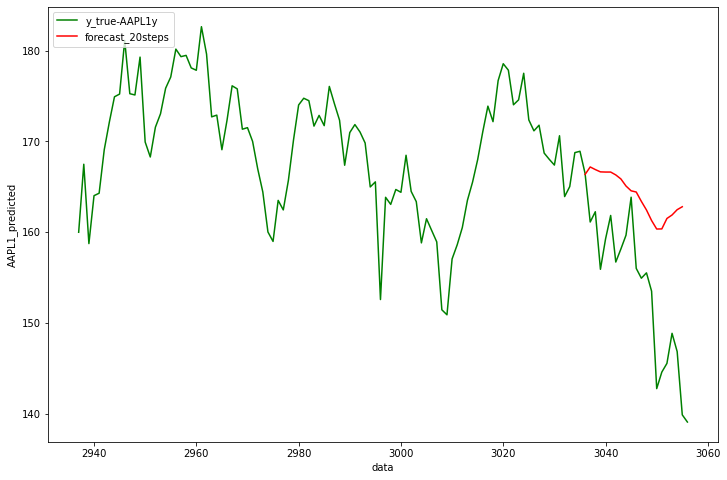

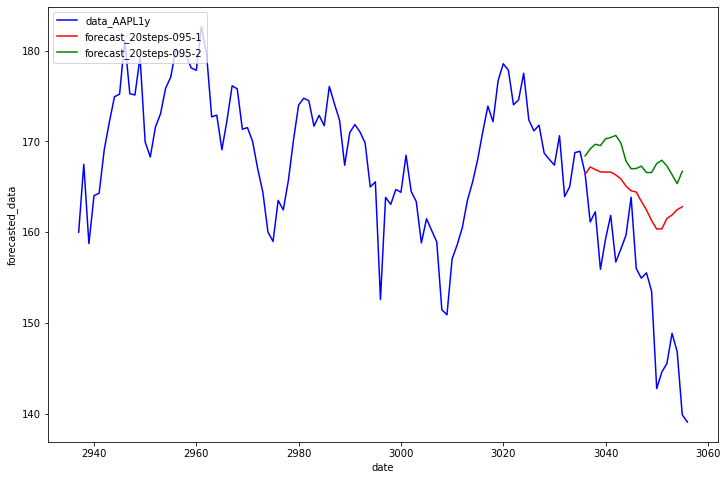

In [30]:
saveautos_path = "D:/TIME_SERIES_FORECASTING/saveautos/"

forcst095 = np.load(saveautos_path +'forcast_20-tr_size1-095-1.npy')
forcst095a = np.load(saveautos_path +'forcast_20-tr_size1-095-2.npy')
#forcst095a = np.load(saveautos_path +'forcast_20-tr_size1-095-11.npy')

print(f"\n forcst095.shape {forcst095.shape} \n")
print(f"forcst095: \n {forcst095} \n")

data_AAPL1y = data4feat_AAPL1.iloc[:,1:2]
data_true = data_AAPL1y[(tr_size1-n_stepsin):(tr_size1+n_stepsout)]

data_forecast = np.zeros((tr_size1+n_stepsout))
data_forecast[0:(tr_size1+n_stepsout)] = np.nan

data_forecast1 = np.zeros((tr_size1+n_stepsout))
data_forecast1[0:(tr_size1+n_stepsout)] = np.nan



data_forecast1[(tr_size1-1):(tr_size1+n_stepsout-1)] = forcst095a[:,-1]
data_forecast[(tr_size1-1):(tr_size1+n_stepsout-1)] = forcst095[:,-1]
#data_forecast1[(tr_size1-n_stepsout-1):(tr_size1-1)] = forcst095a[:,-1]


figtwo(12,8,data_true,data_forecast,'green','red','data','AAPL1_predicted',
       'y_true-AAPL1y','forecast_20steps')

# The figure shows the resulys of training an autots models twice with the same parameters.
figthree(12,8,data_true,data_forecast,data_forecast1,'blue','red','green','date','forecasted_data',
         'data_AAPL1y','forecast_20steps-095-1','forecast_20steps-095-2')
